In [24]:
import json
from pathlib import Path
import numpy as np

from plot_utils import plot_sample

In [8]:
# root_dir = Path("../nemo_experiments/Stream_VAD/drc_Multilang_sgdlr1e-3_wd1e-4_augx_b128_gacc1_ep50_w8/frame_vad_output/")
root_dir = Path("../nemo_experiments/checkpoints/")
test_folder = root_dir / Path("vad_output_ch120_CH109_eval_10ms")


manifest_file = test_folder / Path("manifest_vad_input.json")
pred_frame_dir = test_folder / Path("frame_predictions")
gt_frame_dir = test_folder / Path("frames_groundtruth")

In [4]:
def load_manifest(manifest_file):
    results = {}
    with Path(manifest_file).open("r") as fin:
        for line in fin.readlines():
            item = json.loads(line.strip())
            audio_file = item["audio_filepath"]
            key = Path(audio_file).stem
            results[key] = audio_file
    return results

def load_frames(data_dir):
    results = {}
    for frames_file in Path(data_dir).glob("*.frame"):
        key = frames_file.stem
        results[key] = str(frames_file)
    return results


In [9]:
audio_dict = load_manifest(manifest_file)
pred_frame_dict = load_frames(pred_frame_dir)
gt_frame_dict = load_frames(gt_frame_dir)

In [22]:
post_args = {
    "onset": 0.5, # onset threshold for detecting the beginning and end of a speech
    "offset": 0.8, # offset threshold for detecting the end of a speech.
    "pad_onset": 0.0, # adding durations before each speech segment
    "pad_offset": 0.0, # adding durations after each speech segment
    "min_duration_on": 0.0, # threshold for small non_speech deletion
    "min_duration_off": 0.2, # threshold for short speech segment deletion
    "filter_speech_first": True, 
    "frame_length_in_sec": 0.01
}
duration = None

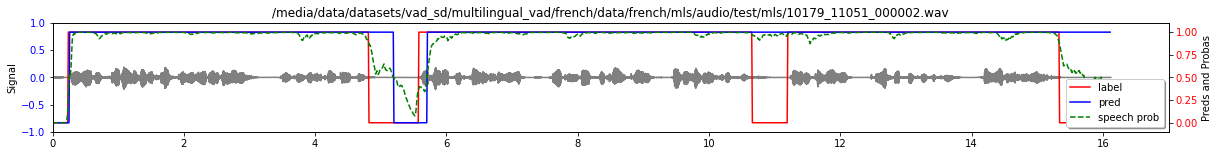

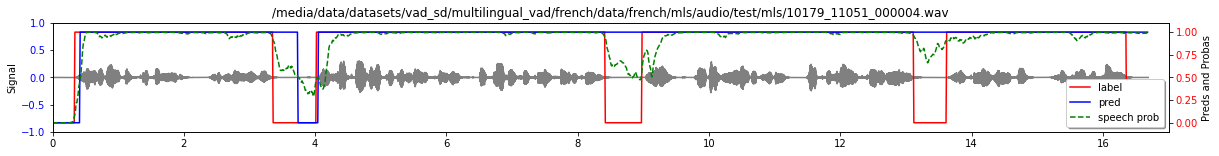

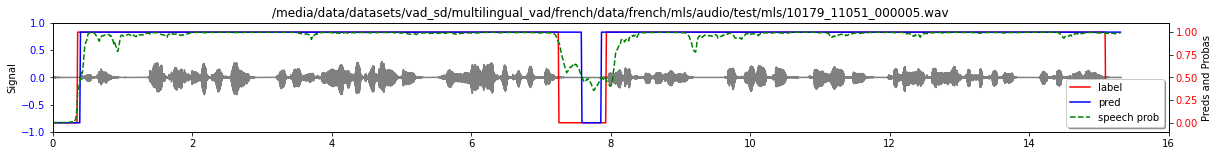

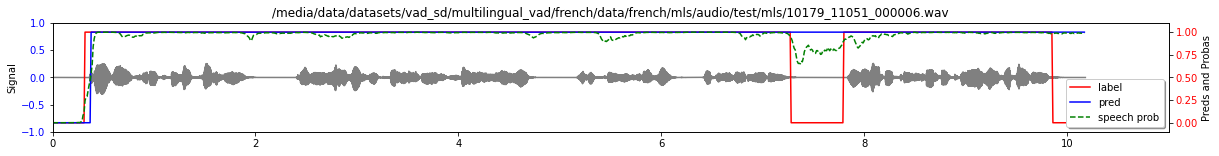

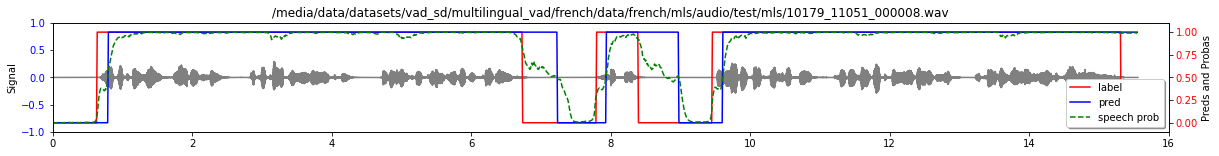

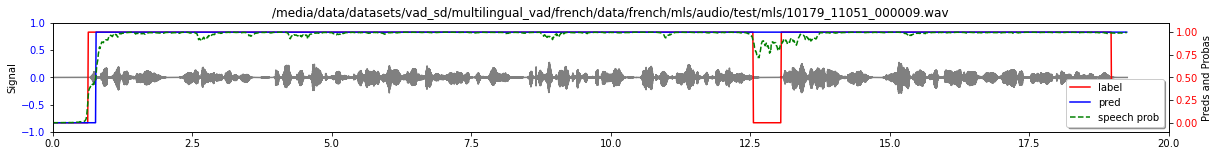

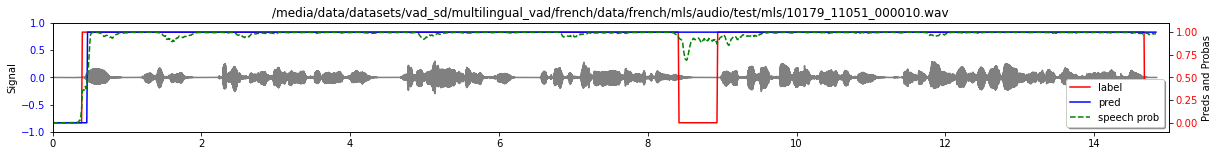

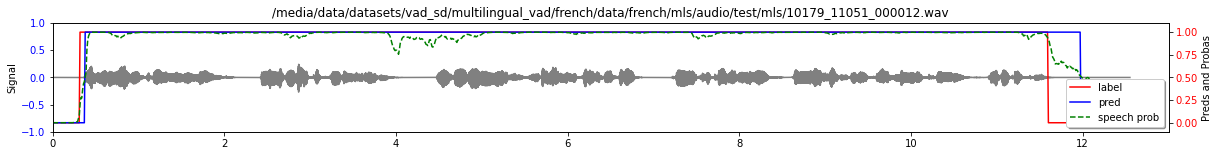

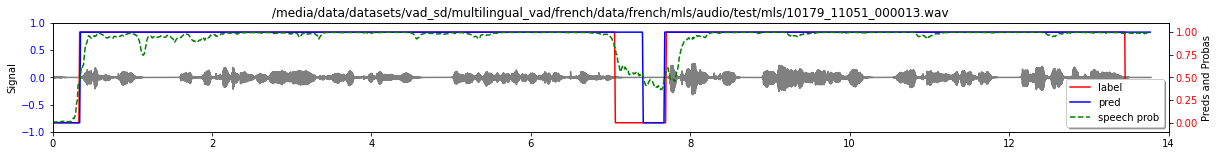

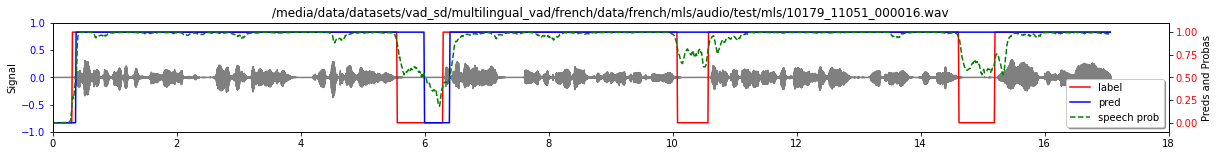

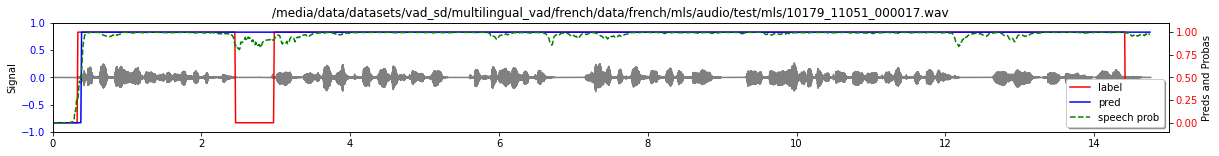

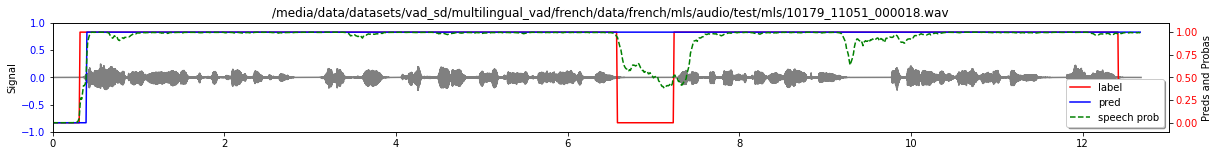

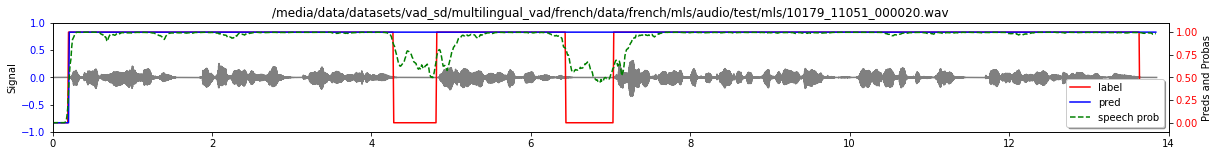

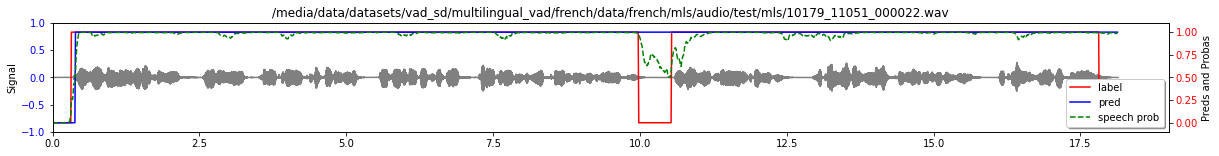

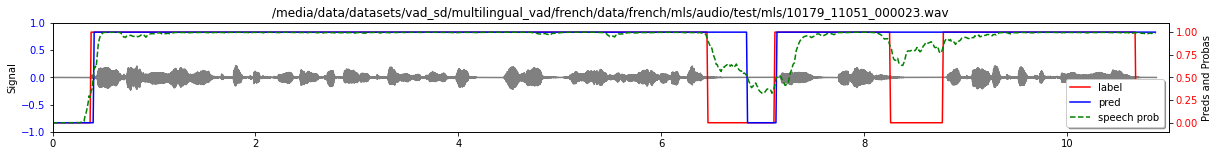

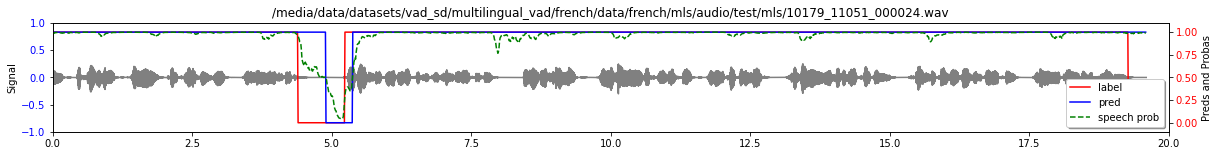

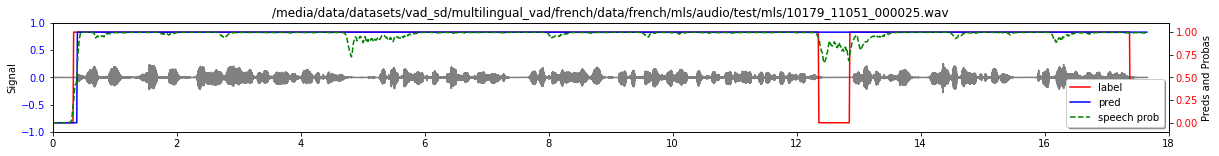

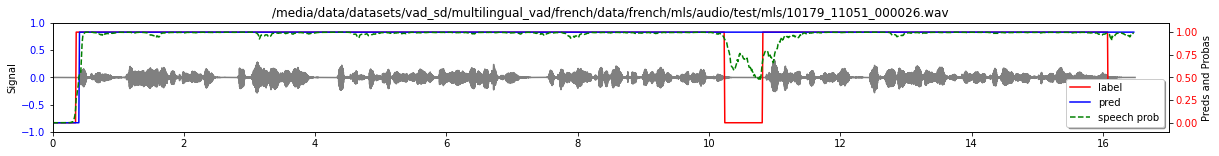

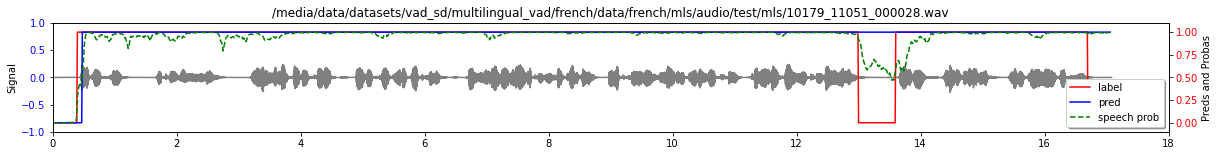

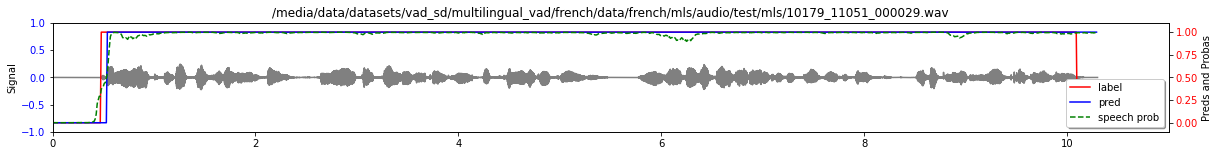

In [23]:
num_samples = 20
all_keys = sorted(list(audio_dict.keys()))
keys_sampled = all_keys[:num_samples] #np.random.choice(all_keys, num_samples)
for key in keys_sampled:
    plot_sample(audio_dict[key], pred_frame_dict[key], gt_frame_dict[key], per_args=post_args, duration=duration)
    


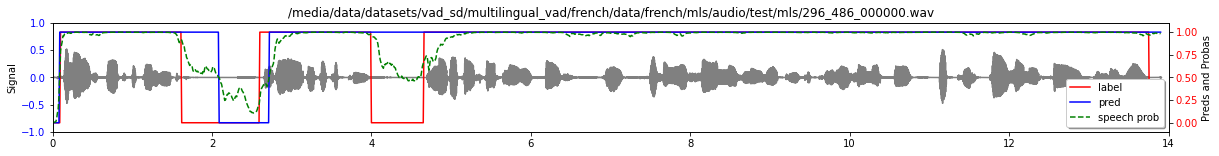

<Figure size 432x288 with 0 Axes>

In [11]:
key = "296_486_000000"
plot_sample(audio_dict[key], pred_frame_dict[key], gt_frame_dict[key], per_args=post_args)